## Q-Q Plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
from sklearn.preprocessing import StandardScaler

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [3]:
male_tipr = df[df['sex'] == 'Male']['tip_rate']
female_tipr = df[df['sex'] == 'Female']['tip_rate']

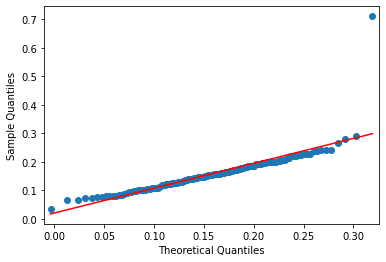

In [4]:
# sns.displot(male_tipr)
fig = qqplot(male_tipr, line='r',
             dist=stats.norm(loc=np.mean(male_tipr),
             scale=np.sqrt(stats.tvar(male_tipr))))

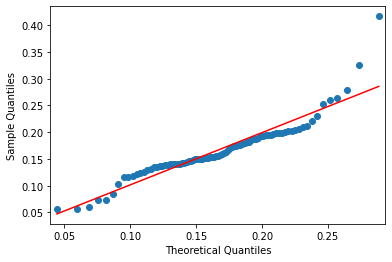

In [5]:
fig = qqplot(female_tipr, line='r',
             dist=stats.norm(loc=np.mean(female_tipr),
             scale=np.sqrt(stats.tvar(female_tipr))))

## シャピロ・ウィルク検定

df

In [6]:
stats.shapiro(male_tipr)

ShapiroResult(statistic=0.7447847127914429, pvalue=3.2243281107541917e-15)

Ｐ値 が５％以下なので正規分布ではない。

In [7]:
stats.shapiro(np.sort(male_tipr)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

Ｐ値が5%以上なので正規分布である、とうことを否定できない。

In [8]:
stats.shapiro(np.sort(female_tipr)[:-2])

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

Ｐ値 が５％以下なので正規分布ではない。

- シャピロ・ウィルクの検定を使う時は、はずれ値に注意する。（必要に応じて取り除いて検定する）
- シャピロ・ウィルクの検定だけ使用して確認するのではなく、Q-Q Plot と合わせて使うことで、より納得いくかたちでその Data の正規性を確認できる。

## F分布

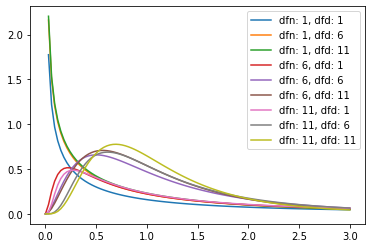

In [9]:
x = np.linspace(0, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f.pdf(x, dfn=dfn, dfd=dfd)
        plt.plot(x, y, label=f'dfn: {dfn}, dfd: {dfd}')

plt.legend()


In [10]:
print(y)

[0.00000000e+00 1.39998061e-04 2.30290807e-03 1.04738957e-02
 2.82775061e-02 5.75619590e-02 9.82562214e-02 1.48823456e-01
 2.06858145e-01 2.69611993e-01 3.34377539e-01 3.98728933e-01
 4.60646806e-01 5.18560038e-01 5.71333688e-01 6.18225855e-01
 6.58829672e-01 6.93011127e-01 7.20849240e-01 7.42582197e-01
 7.58561023e-01 7.69211161e-01 7.75001581e-01 7.76420644e-01
 7.73957805e-01 7.68090191e-01 7.59273158e-01 7.47934030e-01
 7.34468315e-01 7.19237818e-01 7.02570178e-01 6.84759423e-01
 6.66067262e-01 6.46724848e-01 6.26934841e-01 6.06873633e-01
 5.86693618e-01 5.66525454e-01 5.46480233e-01 5.26651566e-01
 5.07117513e-01 4.87942388e-01 4.69178409e-01 4.50867202e-01
 4.33041159e-01 4.15724664e-01 3.98935190e-01 3.82684271e-01
 3.66978372e-01 3.51819651e-01 3.37206636e-01 3.23134817e-01
 3.09597163e-01 2.96584574e-01 2.84086273e-01 2.72090149e-01
 2.60583047e-01 2.49551024e-01 2.38979564e-01 2.28853764e-01
 2.19158491e-01 2.09878512e-01 2.00998610e-01 1.92503672e-01
 1.84378771e-01 1.766092

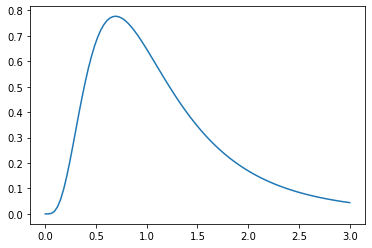

In [11]:
plt.plot(x, y)

## Ｆ検定

In [12]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [17]:
print(np.var(male_tipr), np.var(female_tipr))

0.004169445577529409 0.00284330042554882


In [18]:
n1 = len(male_tipr)
n2 = len(female_tipr)
dfn = n1 - 1
dfd = n2 - 1
var1 = stats.tvar(male_tipr)
var2 = stats.tvar(female_tipr)
f = var1 / var2
print(f)

1.4588472200534603


In [20]:
stats.f(dfn=dfn, dfd=dfd).sf(f)

0.027100863454374447

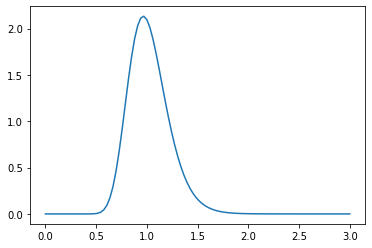

In [19]:
x = np.linspace(0, 3, 100)
y = stats.f(dfn=dfn, dfd=dfd).pdf(x)
plt.plot(x, y)